In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats as stats
from scipy.stats import norm as norm
plt.rcParams["figure.figsize"] = (10,7)

# Problem 1

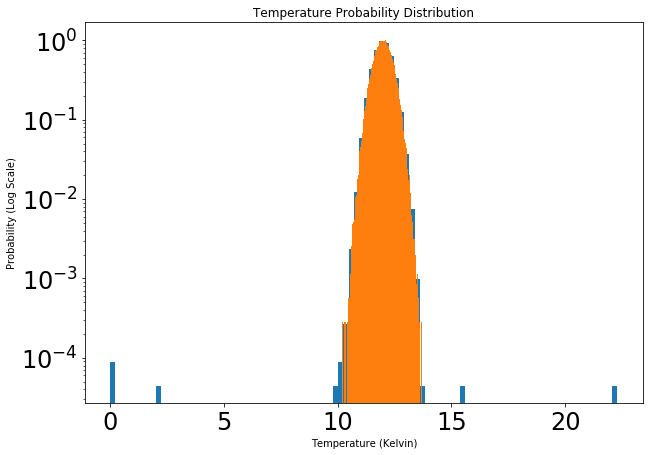

[10.0, 2.1, 0.0, 0.0, 15.6, 22.3]


In [9]:
#A) So our goal is to identify bad data and throw it out.

#Start by exploring the data you have created with appropriate plots
#State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')



mask_dist = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)

errorvals = []
maskresult = []

for i in range(len(d)):
    probability = stats.norm.cdf(d[i], loc = 12., scale = 0.4)
    sigma = stats.norm.ppf(probability)
    if sigma > 5 or sigma < -5:
        errorvals.append(d[i])
    else: 
        maskresult.append(d[i])

ax.hist(maskresult, 100, density=True)
plt.yscale('log')
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Probability (Log Scale)')
plt.title('Temperature Probability Distribution')
plt.show()
print(errorvals)

### Restate your question in math. Be very clear.
Given that our function is a Gaussian distribution with $\mu = 12$ and $\sigma = 0.4$, we can use the function: 
$ \int_{-\infty}^d \frac{1}{\sqrt{2\pi \cdot 0.4}} e^-\frac{(x-12)^2}{2(0.4^2)}$

How likely is it that we find a true value greater than 5 sigma away from the distribution?

### Apply your statistical test and construct a truth table.

|True Correct Value|True Incorrect Value
-|-|-
Identified Correct Value  |100000|2
Identified Incorrect Value|0|6

### B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?
The number of omissions goes up as the selected sigma decreases. This is predictable because as sigma is lower and our bounds are tightened we can expect that a greater number of good data is thrown out mistakenly.

### C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

There are some mistakes of commission, in this instance there were two. They are avoidable, but not at the cost of excluding good data. Bad data gets in when we use a higher sigma as our benchmark.

# Problem 2

1. What is the question in words?

   The question in words is "What amount of arcsecond motion is indicative of an asteroid's presence (5 sigma or less)?" 
   
1. What is the question in math?

    A Rayleigh distribution is the result of a vector amplitude distribution in the context of a 2D Gaussian, so we can calculate PDF and sigma using

    $ PDF =\int_{5\sigma}^\infty \frac{x}{\sigma^2}e^\frac{-x^2}{2\sigma^2}dx$
    
    $5\sigma =3\cdot10^{-7}$
    to determine what the correct value of arcseconds is for a 5 sigma distribution.

3. What distance in arcseconds represents a 5 sigma detection of motion?

In [17]:
prob = stats.norm.cdf(5)
sigma = stats.rayleigh.ppf(prob)

print("5 sigma detection at distance:", sigma)

5 sigma detection at distance: 5.489079776034238


# Problem 3

1. What is the question in words?
    
    The question in words is "What is the likelihood that the background signal is as signal like as 6800 cosmic rays?"

2. Translate the question to math, describing both the expected background pdf() and the integral you need to do.

    Using a Poisson distribution of cosmic rays where expected value of 1 ray/minute, we can calculate the mean of the distribution by further using the fact that we are looking at 8 hours a day for 15 days to get an expected rate (lambda) of 7200 cosmic rays. This gives us the function: 

    $PDF = \int_0^{6800}\frac{\lambda^x}{x!}e^{-7200}dx $ 

3. Convert to sigma.

In [14]:
prob = 1 - stats.poisson.cdf(6800, 7200, 0)
sigma = stats.norm.ppf(prob)

print("Moon shadow detection with 6800 rays: ", sigma)

Moon shadow detection with 6800 rays:  4.750747965778662
